In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X= np.arange(1,21).reshape(-1,1)
y= np.array([10,12,15,18,20,25,30,28,35,40,45,42,50,55,60,58,65,70,72,75])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
X_new = np.arange(1,21).reshape(-1,1)
y_pred = model.predict(X_new)

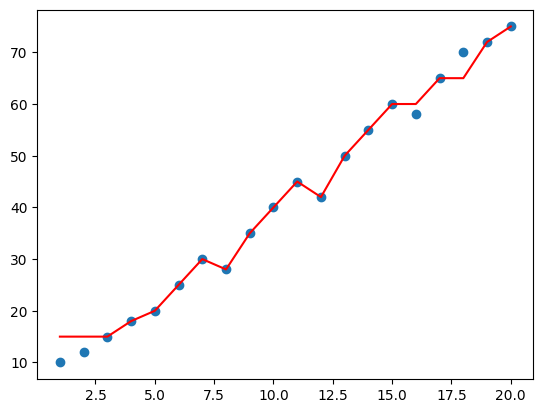

In [ ]:
plt.scatter(X,y)
plt.plot(X_new,y_pred,color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

15.75


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9781477627471384


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
X_grid= np.linspace(min(X),max(X),100).reshape(-1,1)
y_pred = rf.predict(X_grid)

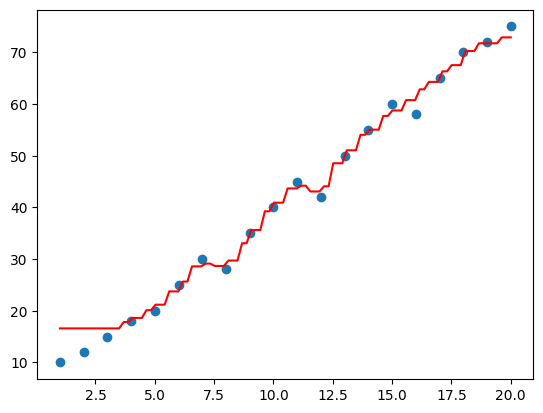

In [ ]:
plt.scatter(X,y)
plt.plot(X_grid,y_pred,color='red')
plt.show()

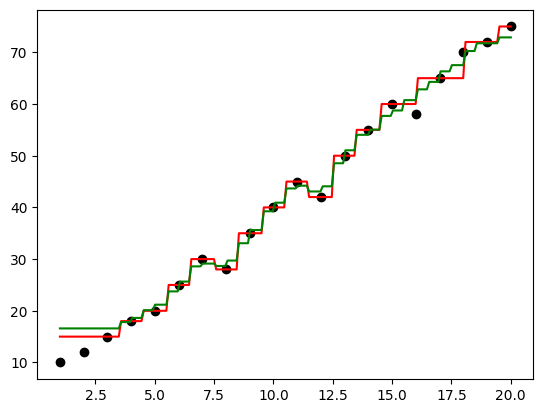

In [ ]:
X_grid = np.linspace(1,20,200).reshape(-1,1)
plt.scatter(X,y,color='black')
plt.plot(X_grid,model.predict(X_grid),color='red')
plt.plot(X_grid,rf.predict(X_grid),color='green')
plt.show()

In [ ]:
df_pred = model.predict(X_test)
df_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_test,df_pred)
r2_rf = r2_score(y_test,df_pred_rf)
mse = mean_squared_error(y_test,df_pred)
mse_rf = mean_squared_error(y_test,df_pred_rf)
print("DecisionTree Regressor")
print("MSE:",mse)
print("R2:",r2)
print("RandomForest Regressor")
print("MSE:",mse_rf)
print("R2:",r2_rf)


DecisionTree Regressor
MSE: 15.75
R2: 0.9781477627471384
RandomForest Regressor
MSE: 19.552275000000005
R2: 0.9728723204994797


House Price dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving house_data.csv to house_data (1).csv


In [ ]:
df = pd.read_csv('house_data (1).csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

X = df.drop('price', axis=1)
y = df['price']


categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor


dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(
        random_state=42,
        max_depth=10
    ))
])


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Performance")
print(f"MSE: {mse_dt:.2f}")
print(f"R² : {r2_dt:.3f}")


Decision Tree Regressor Performance
MSE: 997223887113.12
R² : 0.022


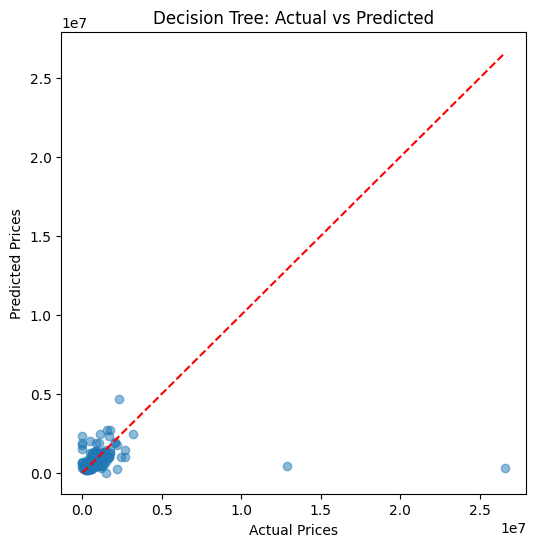

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance")
print(f"MSE: {mse_rf:.2f}")
print(f"R² : {r2_rf:.3f}")


Random Forest Regressor Performance
MSE: 969119853531.68
R² : 0.050


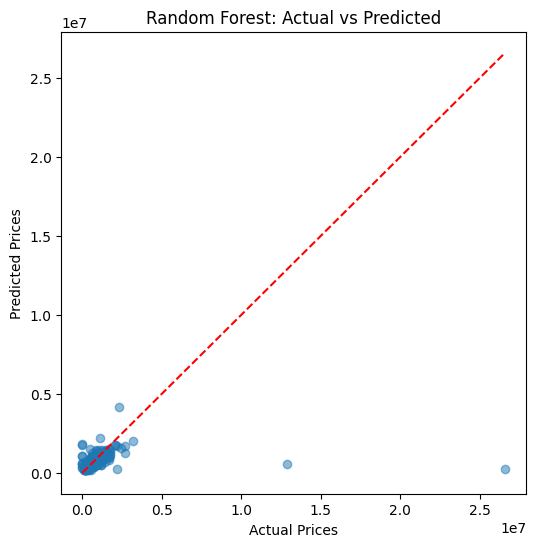

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
lr_model = LinearRegression()


ensemble_model = VotingRegressor(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('lr', lr_model)
])


ensemble_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', ensemble_model)
])


ensemble_pipeline.fit(X_train, y_train)


y_pred_ensemble = ensemble_pipeline.predict(X_test)


mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model Performance (Voting Regressor)")
print(f"MSE: {mse_ensemble:.2f}")
print(f"R² : {r2_ensemble:.3f}")


Ensemble Model Performance (Voting Regressor)
MSE: 973008265644.96
R² : 0.046


In [ ]:

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Ensemble Model'],
    'MSE': [mse_dt, mse_rf, mse_ensemble],
    'R2': [r2_dt, r2_rf, r2_ensemble]
})

print(results)


            Model           MSE        R2
0   Decision Tree  9.972239e+11  0.022182
1   Random Forest  9.691199e+11  0.049739
2  Ensemble Model  9.730083e+11  0.045927
